In [16]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import matplotlib.axes as ax 

In [2]:
data = pd.read_csv("data_for_lr.csv")

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.isnull().sum()

x    0
y    1
dtype: int64

# Data Processing 

In [8]:
data = data.dropna()
print('Shape of the data : ' , data.shape)

Shape of the data :  (699, 2)


# Splitting data 

In [13]:
#training input and output
train_input = np.array(data.x[0:500]).reshape(500,1) #We are taking 0 to 499 x_train values. 
train_output = np.array(data.y[0:500]).reshape(500,1)

#Validation data input and output 
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [9]:
np.array(data.x[0:500])

array([ 24.,  50.,  15.,  38.,  87.,  36.,  12.,  81.,  25.,   5.,  16.,
        16.,  24.,  39.,  54.,  60.,  26.,  73.,  29.,  31.,  68.,  87.,
        58.,  54.,  84.,  58.,  49.,  20.,  90.,  48.,   4.,  25.,  42.,
         0.,  60.,  93.,  39.,   7.,  21.,  68.,  84.,   0.,  58.,  19.,
        36.,  19.,  59.,  51.,  19.,  33.,  85.,  44.,   5.,  59.,  14.,
         9.,  75.,  69.,  10.,  17.,  58.,  74.,  21.,  51.,  19.,  50.,
        24.,   0.,  12.,  75.,  21.,  64.,   5.,  58.,  32.,  41.,   7.,
         4.,   5.,  49.,  90.,   3.,  11.,  32.,  83.,  25.,  83.,  26.,
        76.,  95.,  53.,  77.,  42.,  25.,  54.,  55.,   0.,  73.,  35.,
        86.,  90.,  13.,  46.,  46.,  32.,   8.,  71.,  28.,  24.,  56.,
        49.,  79.,  90.,  89.,  41.,  27.,  58.,  26.,  31.,  70.,  71.,
        39.,   7.,  48.,  56.,  45.,  41.,   3.,  37.,  24.,  68.,  47.,
        27.,  68.,  74.,  95.,  79.,  21.,  95.,  54.,  56.,  80.,  26.,
        25.,   8.,  95.,  94.,  54.,   7.,  99.,  3

In [10]:
np.array(data.x[0:500]).reshape(500,1)

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [14]:
print(f"Training input data shape =  {train_input.shape }")
print(f"Training output data shape = {train_output.shape }")
print(f"Testing  input  data shape = {test_input.shape }")
print(f"Testing  output data shape = {test_input.shape }")

Training input data shape =  (500, 1)
Training output data shape = (500, 1)
Testing  input  data shape = (199, 1)
Testing  output data shape = (199, 1)


# Linear Regression 

In [32]:
#Forward Propagation 

In [33]:
def forward_propagation(train_input , parameters):
    m = parameters["m"] #Dictionary 
    c = parameters["c"]
    
    predictions = np.multiply (m , train_input) +c
    
    return predictions

In [34]:
#Cost function 

In [35]:
def cost_function( predictions ,train_output ):
    cost = np.mean((train_output - predictions ) ** 2)*0.5 
    return cost 

In [36]:
#Gradient Descent for Backward Propagation 

In [37]:
def backward_propagation( train_input , train_output , predictions ):
    derivatives = dict()
    DF = predictions - train_output  #DF is an array. 
    DM = np.mean(np.multiply (DF , train_input))
    DC = np.mean(DF) 
    
    derivatives["DM"] = DM 
    derivatives["DC"] = DC
    
    return derivatives

# Update Parameters 

In [38]:
def update_parameters(parameters , derivatives , learning_rate):
    parameters["m"]= parameters["m"] - learning_rate*derivatives['DM']
    parameters["c"]= parameters["c"] - learning_rate*derivatives['DC']
    return parameters 

# Model Training 

In [39]:
def train(train_input , train_output , learning_rate , iters):
    
    #Random parameters 
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)

    plt.figure()#We define a figure 
    #loss 
    loss = list()
    
    #iteration 
    for i in range(iters):
        
        #forward propagation 
        predictions = forward_propagation(train_input , parameters)
        
        #cost
        cost = cost_function(predictions , train_output)
        
        loss.append(cost)
        print(f"Iteration = {i+1} , Loss = {cost}")
        
        #plot (For display)
        fig , ax = plt.subplots()
        ax.plot(train_input , train_output,"+" , label = "Original")
        ax.plot(train_input , predictions,"+" , label = "Training")

        legend = ax.legend()
        
        plt.plot(train_input , train_output,"+" , label = "Original")
        plt.plot(train_input , predictions,"+" , label = "Training")
        plt.show()
        
        #back propagation 
        derivatives = backward_propagation(train_input , train_output , predictions)
        
        #Update the parameters 
        parameters = update_parameters ( parameters , derivatives , learning_rate)
        
    return parameters


# Training 

Iteration = 1 , Loss = 504.1134916024159


<Figure size 640x480 with 0 Axes>

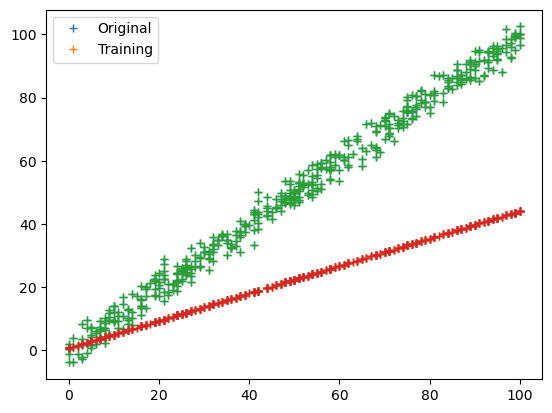

Iteration = 2 , Loss = 230.90639996153473


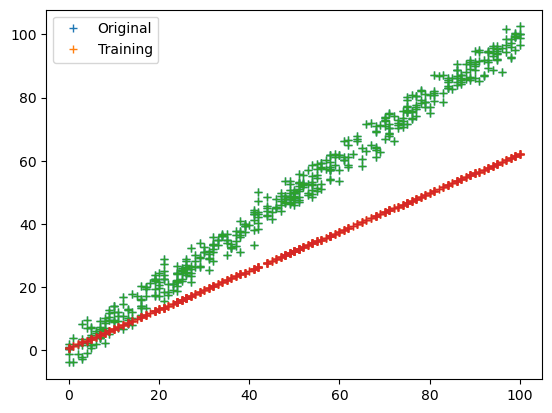

Iteration = 3 , Loss = 106.95203718247824


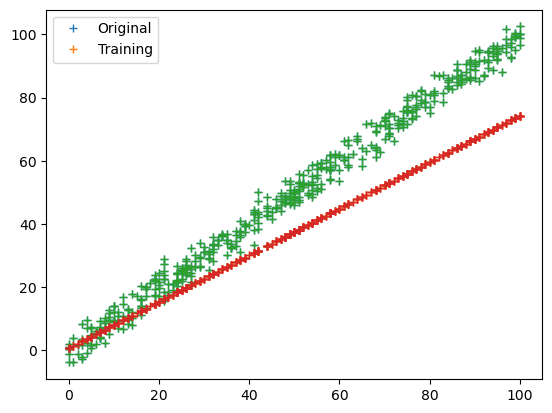

Iteration = 4 , Loss = 50.71380280664063


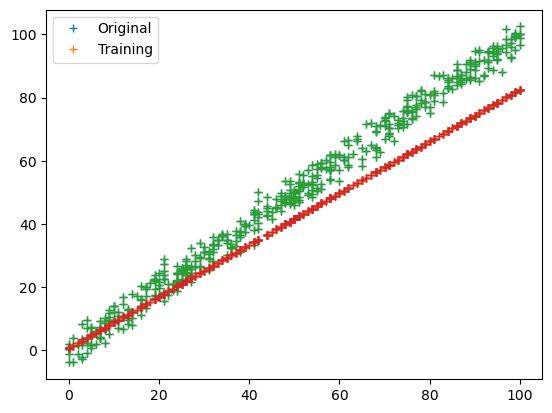

Iteration = 5 , Loss = 25.198450892653398


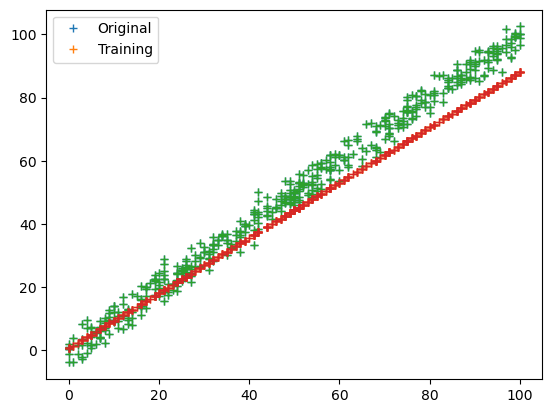

Iteration = 6 , Loss = 13.622104781673869


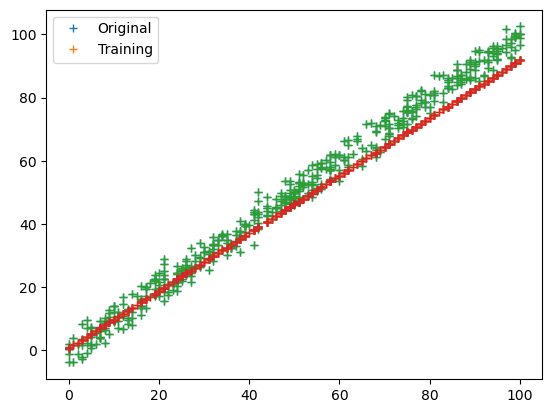

Iteration = 7 , Loss = 8.369901043071502


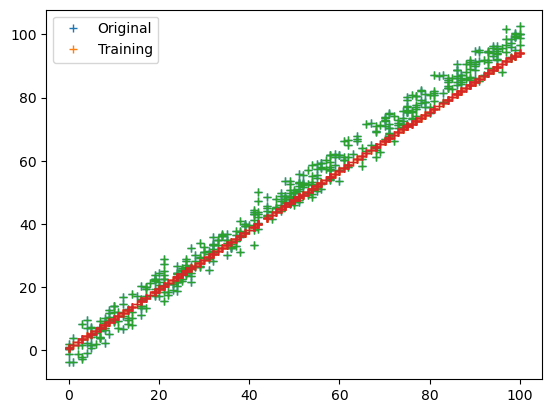

Iteration = 8 , Loss = 5.986967703832676


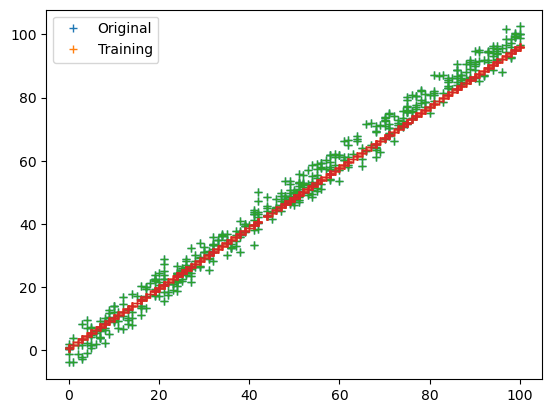

Iteration = 9 , Loss = 4.905825523042511


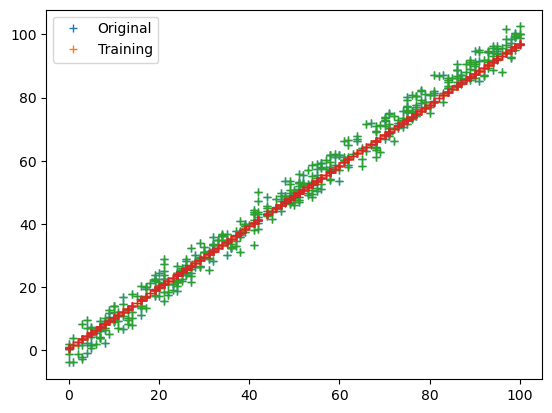

Iteration = 10 , Loss = 4.415307432893317


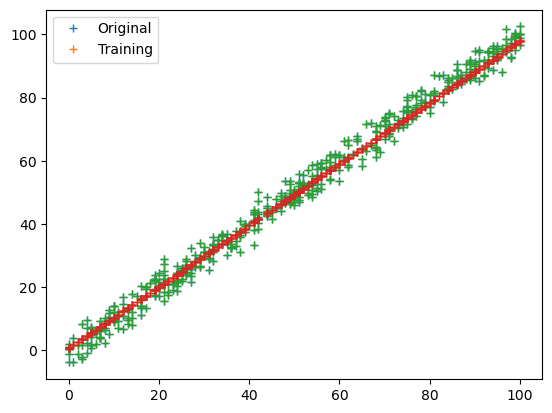

Iteration = 11 , Loss = 4.192756147002775


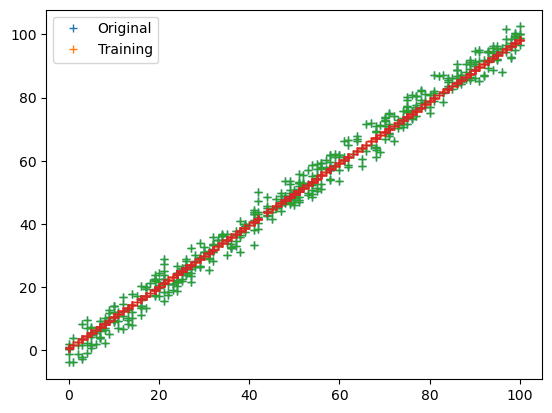

Iteration = 12 , Loss = 4.091781697150722


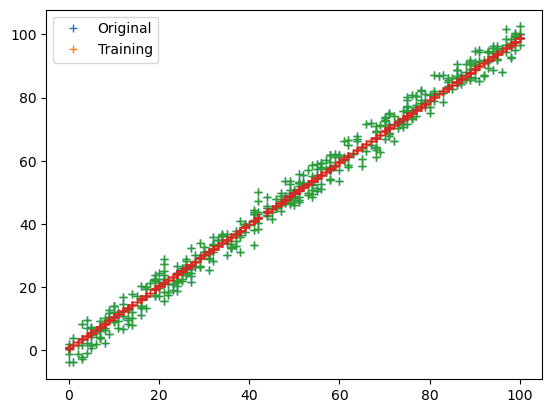

Iteration = 13 , Loss = 4.045966792608089


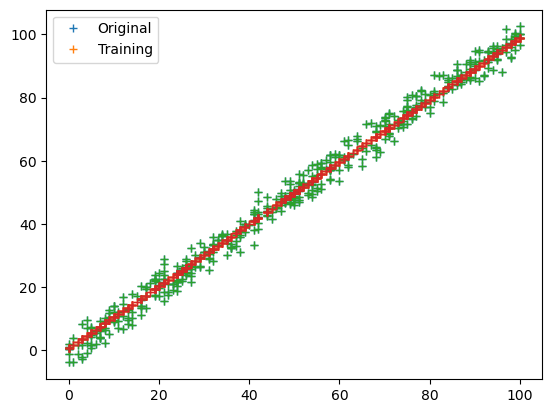

Iteration = 14 , Loss = 4.02517783500457


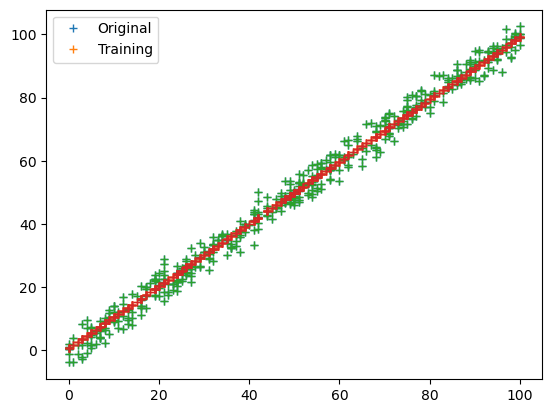

Iteration = 15 , Loss = 4.0157431773823316


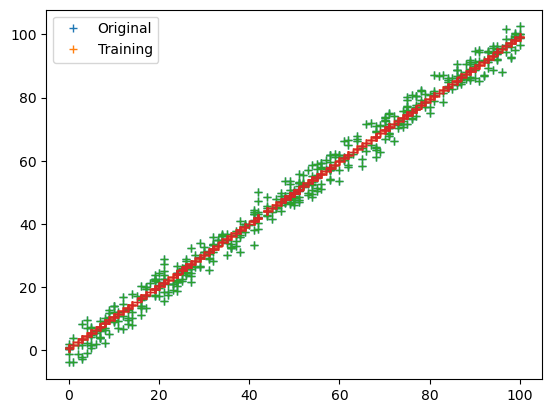

Iteration = 16 , Loss = 4.011459978373321


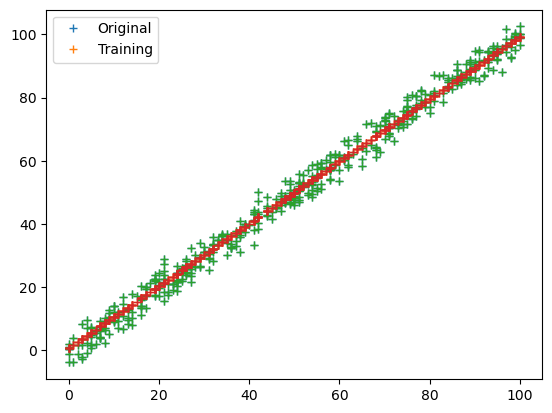

Iteration = 17 , Loss = 4.009514001978321


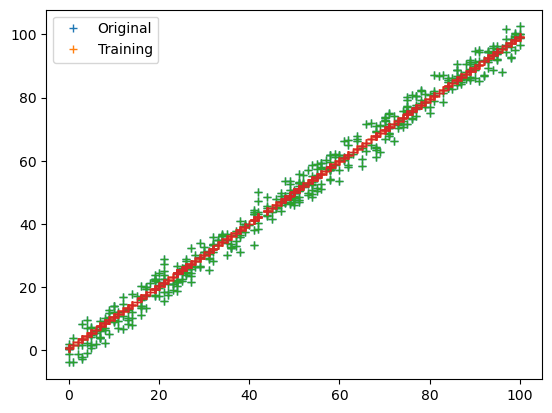

Iteration = 18 , Loss = 4.0086284262073155


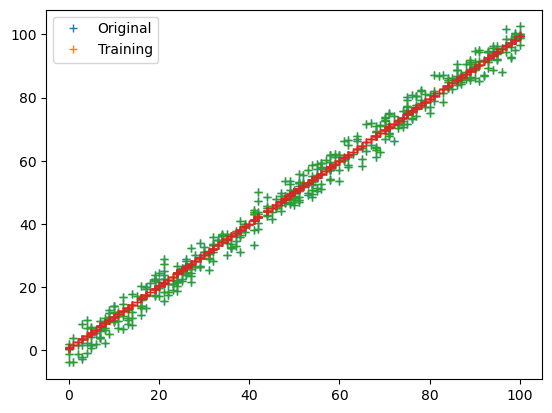

Iteration = 19 , Loss = 4.00822395550917


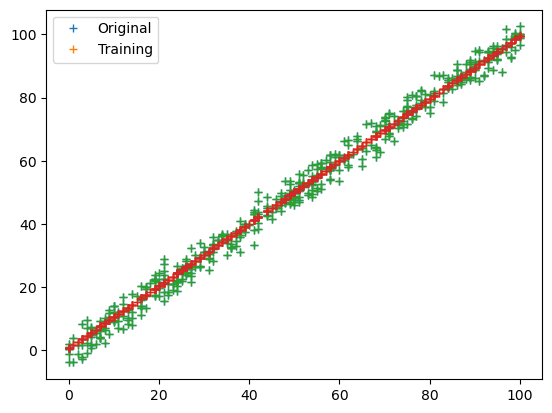

Iteration = 20 , Loss = 4.008037762850672


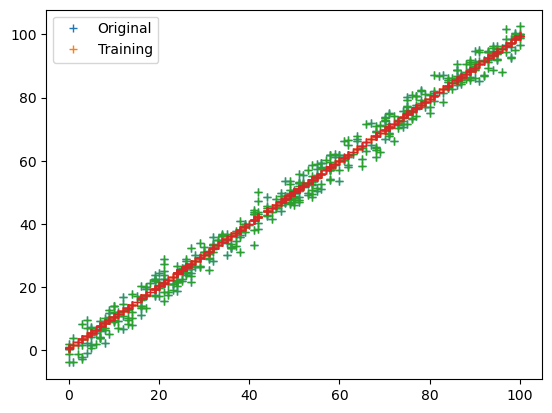

In [47]:
parameters , loss = train(train_input , train_output , 0.0001 , 20 ) #We take iterations = 20 

#Check Iteration and Loss @ Every step . 

# LR Model Prediction 

In [ ]:
test_predictions = test_input*parameters[] + parameters[]

In [ ]:
plt.plot(test_input , test_predictions  , "+")
plt .plot(test_input , test_output , ".")
plt.show()

In [ ]:
#LRMP1.jpeg
#Dotted - Actual o/p , + - Predicted o/p ; They are almost alligned i.e Our model is working properly. 

In [ ]:
cost_function(test_output , test_predictions )
#o/p = 4.05  #So this is the error in prediction , How close you are towards your prediction. 